# Sparseloop Tutorial - 00 - Background

The notebooks with names "\<number\>.1-\<name\>-fibertree" contain a series of examples of various computations using the  **fibertree** emulator to illustrate the impact of a set of optimizations to exploit sparsity. 

To initialize the fibertree environment some setup is required using the incantation in the following cell:

In [4]:
# Run boilerplate code to set up environment

%run ./prelude.py --style=tree --animation=movie

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='style', options=('tree', 'uncompressed', 'tree+uncompressed'), val…

Button(description='Run all cells below', style=ButtonStyle())

## Einsum notation

The computations in there notebooks will generally be characterized by an Einsum-style expression. For example the Einsum for matrix multiply is:

$$ A_{m,n} = A_{m,k} \times B_{k,n} $$
    
In an Einsum the capital letters represent the **tensors** in the computation and their subscripts (**indices**) indicate the ranks of the tensor. Indices that appear in variables on both the left (output) and right (input) side of the expression mean that a output will be created for each valid values for those indices and that output will be based on the corresponding inputs with the same index values. The ranks associated with such indices are referred to as **uncontracted** dimensions. Indices that only appear on the right imply that there is a reduction across all the values of that index. The ranks associated with such indices are referred to as **contracted** dimensions. 

## Coding conventions

These fibertree-based notebooks usually following the following naming convention:

- Rank names (or **ids**) will be an uppercase letter string, e.g., "K"
- Variables holding the **shape** of a fiber in a rank will be an uppercase letter matching the name of the rank, e.g., `K`
- Variables holding a **coordinate** in a fiber of a  rank will be a lowercase letter matching the name of the rank, e.g., `k`
- Variables holding a **tensor** will be uppercase letters with the name of the tensor followed by an underscore (_) and the names of its ranks in uppercase, e.g., "A_MK"
- Variables holding a **fiber** of a rank will be lowercase letters with the name of the tensor followed by an underscore (_) and the name of the fiber's rank in lowercase, .e.g., "a_m".

## Creating Tensors

The fibertree language allows one to set up Jupyter controls using the `TensorMaker()` class to dynamically set attributes of a randomly populated tensor. The attributes that can be set are:

- name - the name of the tensor
- rank_ids - a list of names of the ranks in the tensor in order from top to bottom
- shape - a list of **shapes** of the fibers in each rank
- interval - the top of the interval starting at 0 of legal values from elements of the tensor
- density - the uniform density for values of elements of tensor being non-zero
- color - a color to use when displaying the tensor
- seed - a random number seed used when creating the tensor

When declaring a tensor the `name` and `rank_ids` parameters are required but default values can be set for all the other attributes using keyword parameters to the `TensorMaker.addTensor()` method.

The cell below declares a rank-1 and a rank-2 tensor.

In [5]:
#
# Set default tensor attributes (i.e., the shape of the tensors)
#
L = 10
N = 5

#
# Create controls to configure the `A` and `B` tensors
#
tm = TensorMaker("sparseloop-background")

tm.addTensor("A", rank_ids=["L"], shape=[L], density=0.4, color="blue")
tm.addTensor("B", rank_ids=["N", "L"], shape=[N, L], density=0.2, color="green")

tm.displayControls()


interactive(children=(Label(value='Tensor Creation Controls', description='Title'), Label(value='Tensor A', de…

## Create and display the tensors

The tensors `A` and `B` declared above can be instantiated using the `TensorMaker.makeTensor()` method and displayed using the `displayTensor()` method.

In the diagrams the tree begins with a root (black diamond). Below the root, the **ranks** are visible as labeled levels in the tree, and each rank consists of one or more **fibers** (grey ovals). Each fiber contains a set of **coordinates** (numbers in brown circles) and each coordinate is assocaited with a **payload** that is either another fiber at the next rank or a leaf **value** (box colored as specified in the control boxes above).
 

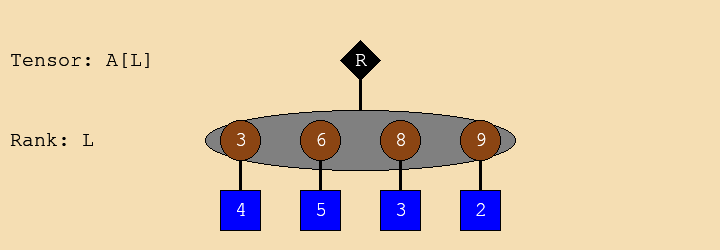

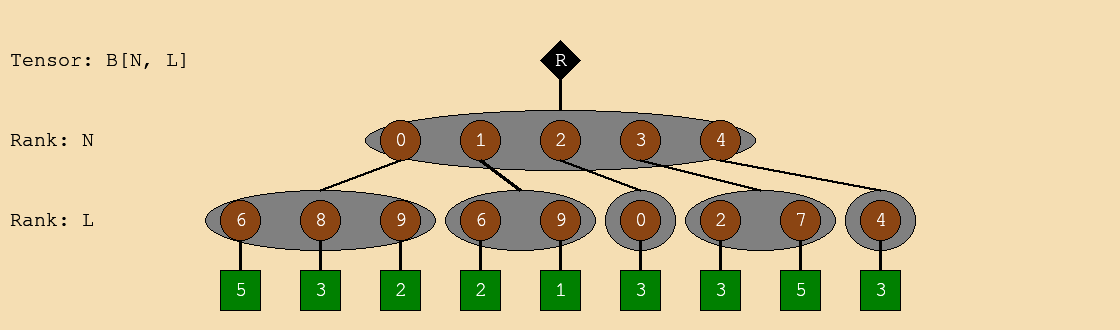

In [6]:
#
# Create instances of the tensors
#

A_K = tm.makeTensor("A")
B_K = tm.makeTensor("B")

#
# Display the tensors
#
displayTensor(A_K)
displayTensor(B_K)


## Testing area

For running alternative algorithms